# Decision Tree Regression - Comprehensive Analysis / Kapsamlı Analiz

**English:** This notebook provides a comprehensive analysis of Decision Tree Regression:
- Dataset exploration and EDA
- Decision Tree Regression model
- Comparison with other regression models
- Hyperparameter optimization
- Model performance evaluation

**Türkçe:** Bu notebook Decision Tree Regression algoritmasının kapsamlı analizini sunar:
- Veri seti keşfi ve EDA
- Decision Tree Regression modeli
- Diğer regression modelleri ile karşılaştırma
- Hiperparametre optimizasyonu
- Model performans değerlendirmesi

In [1]:
# Import necessary libraries / Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Plot settings / Grafik ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Dataset Loading and Initial Exploration / Veri Setini Yükleme ve İlk İnceleme

In [2]:
# Load California Housing dataset / California Housing veri setini yükleyelim
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

print("Dataset shape / Veri seti boyutu:", df.shape)
print("\nDataset description / Veri seti açıklaması:")
print(housing.DESCR[:800] + "...")

Dataset shape / Veri seti boyutu: (20640, 9)

Dataset description / Veri seti açıklaması:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The...


In [3]:
# Display first 5 rows / İlk 5 satırı görüntüleyelim
print("First 5 rows / İlk 5 satır:")
df.head()

First 5 rows / İlk 5 satır:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Basic information about dataset / Veri seti hakkında temel bilgiler
print("Dataset Info / Veri Seti Bilgileri:")
print(df.info())
print("\nStatistical Summary / İstatistiksel Özet:")
df.describe()

Dataset Info / Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Statistical Summary / İstatistiksel Özet:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Check for missing values / Eksik değerleri kontrol edelim
print("Missing values / Eksik değerler:")
print(df.isnull().sum())
print("\nDuplicate rows / Tekrar eden satırlar:", df.duplicated().sum())

Missing values / Eksik değerler:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Duplicate rows / Tekrar eden satırlar: 0


## 2. Exploratory Data Analysis (EDA) / Keşifsel Veri Analizi

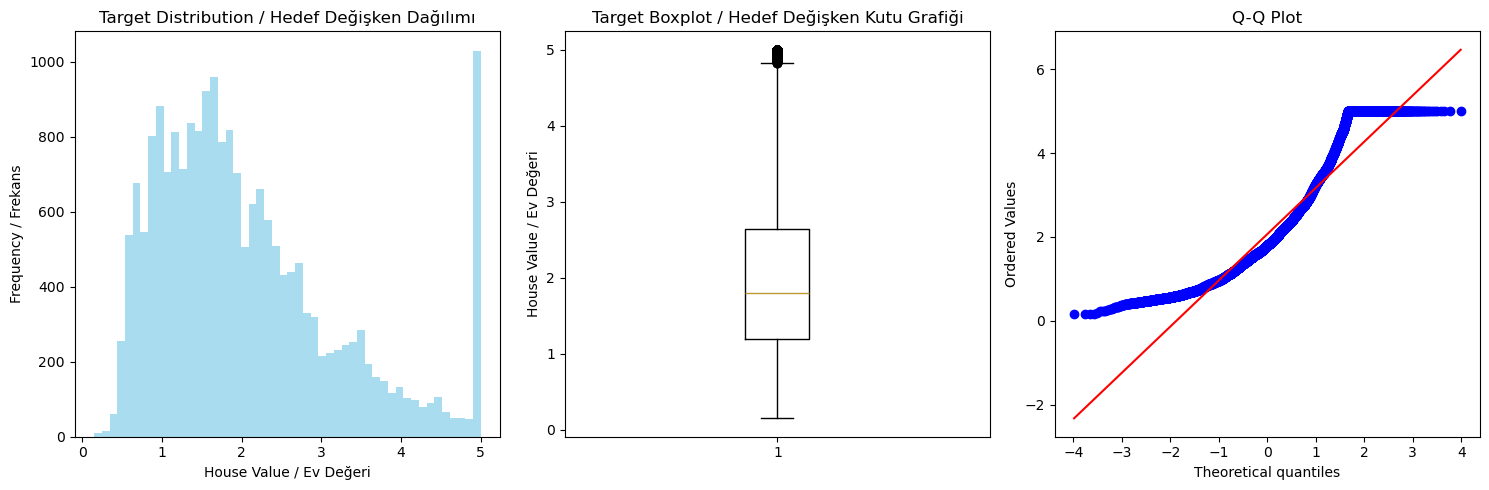

Target variable statistics / Hedef değişken istatistikleri:
Mean / Ortalama: 2.07
Median / Medyan: 1.80
Std / Standart Sapma: 1.15
Skewness / Çarpıklık: 0.98


In [6]:
# Target variable distribution / Hedef değişken dağılımı
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['target'], bins=50, alpha=0.7, color='skyblue')
plt.title('Target Distribution / Hedef Değişken Dağılımı')
plt.xlabel('House Value / Ev Değeri')
plt.ylabel('Frequency / Frekans')

plt.subplot(1, 3, 2)
plt.boxplot(df['target'])
plt.title('Target Boxplot / Hedef Değişken Kutu Grafiği')
plt.ylabel('House Value / Ev Değeri')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(df['target'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

print(f"Target variable statistics / Hedef değişken istatistikleri:")
print(f"Mean / Ortalama: {df['target'].mean():.2f}")
print(f"Median / Medyan: {df['target'].median():.2f}")
print(f"Std / Standart Sapma: {df['target'].std():.2f}")
print(f"Skewness / Çarpıklık: {df['target'].skew():.2f}")

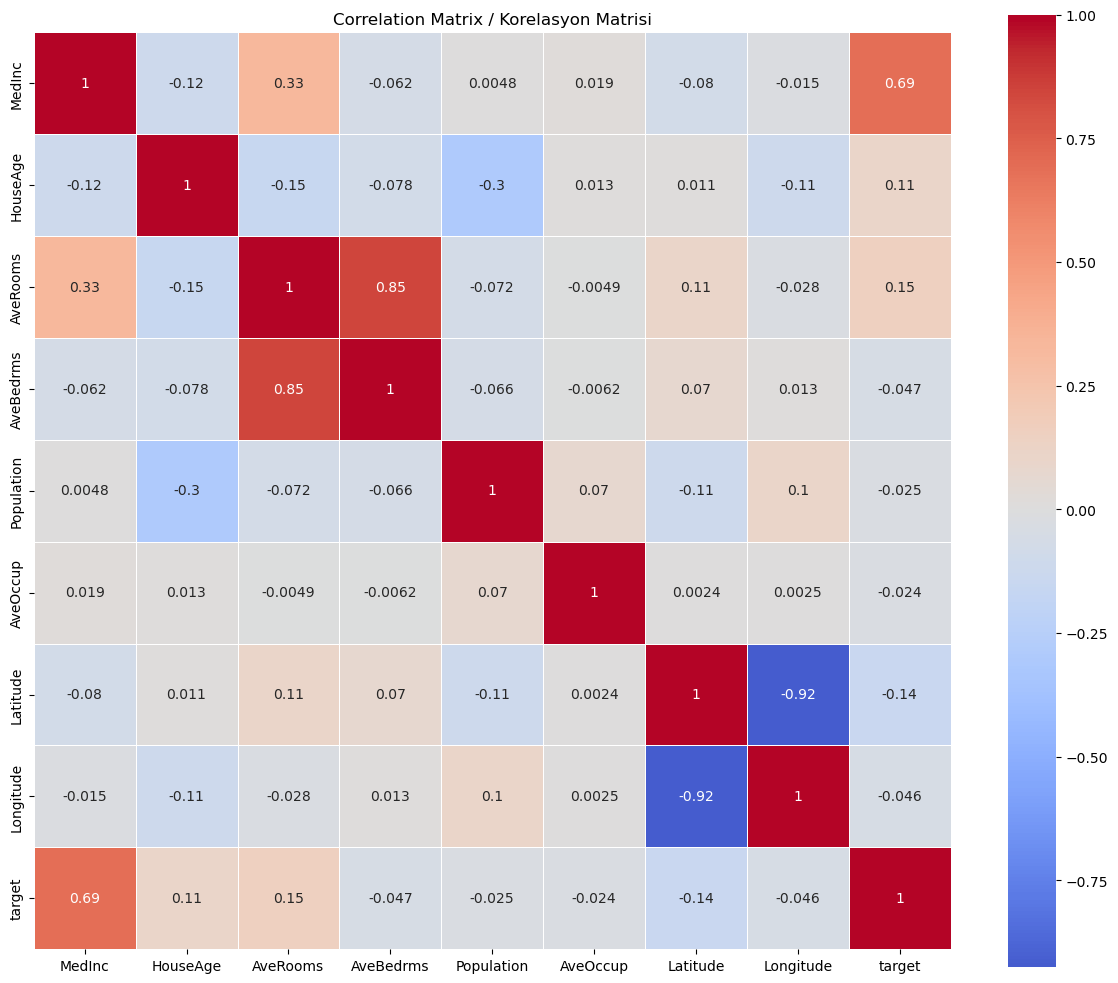


Features correlation with target / Özelliklerin hedef ile korelasyonu:
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: target, dtype: float64


In [7]:
# Correlation matrix / Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix / Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Features most correlated with target / Hedef ile en çok korelasyonlu özellikler
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)
print("\nFeatures correlation with target / Özelliklerin hedef ile korelasyonu:")
print(target_corr[1:])

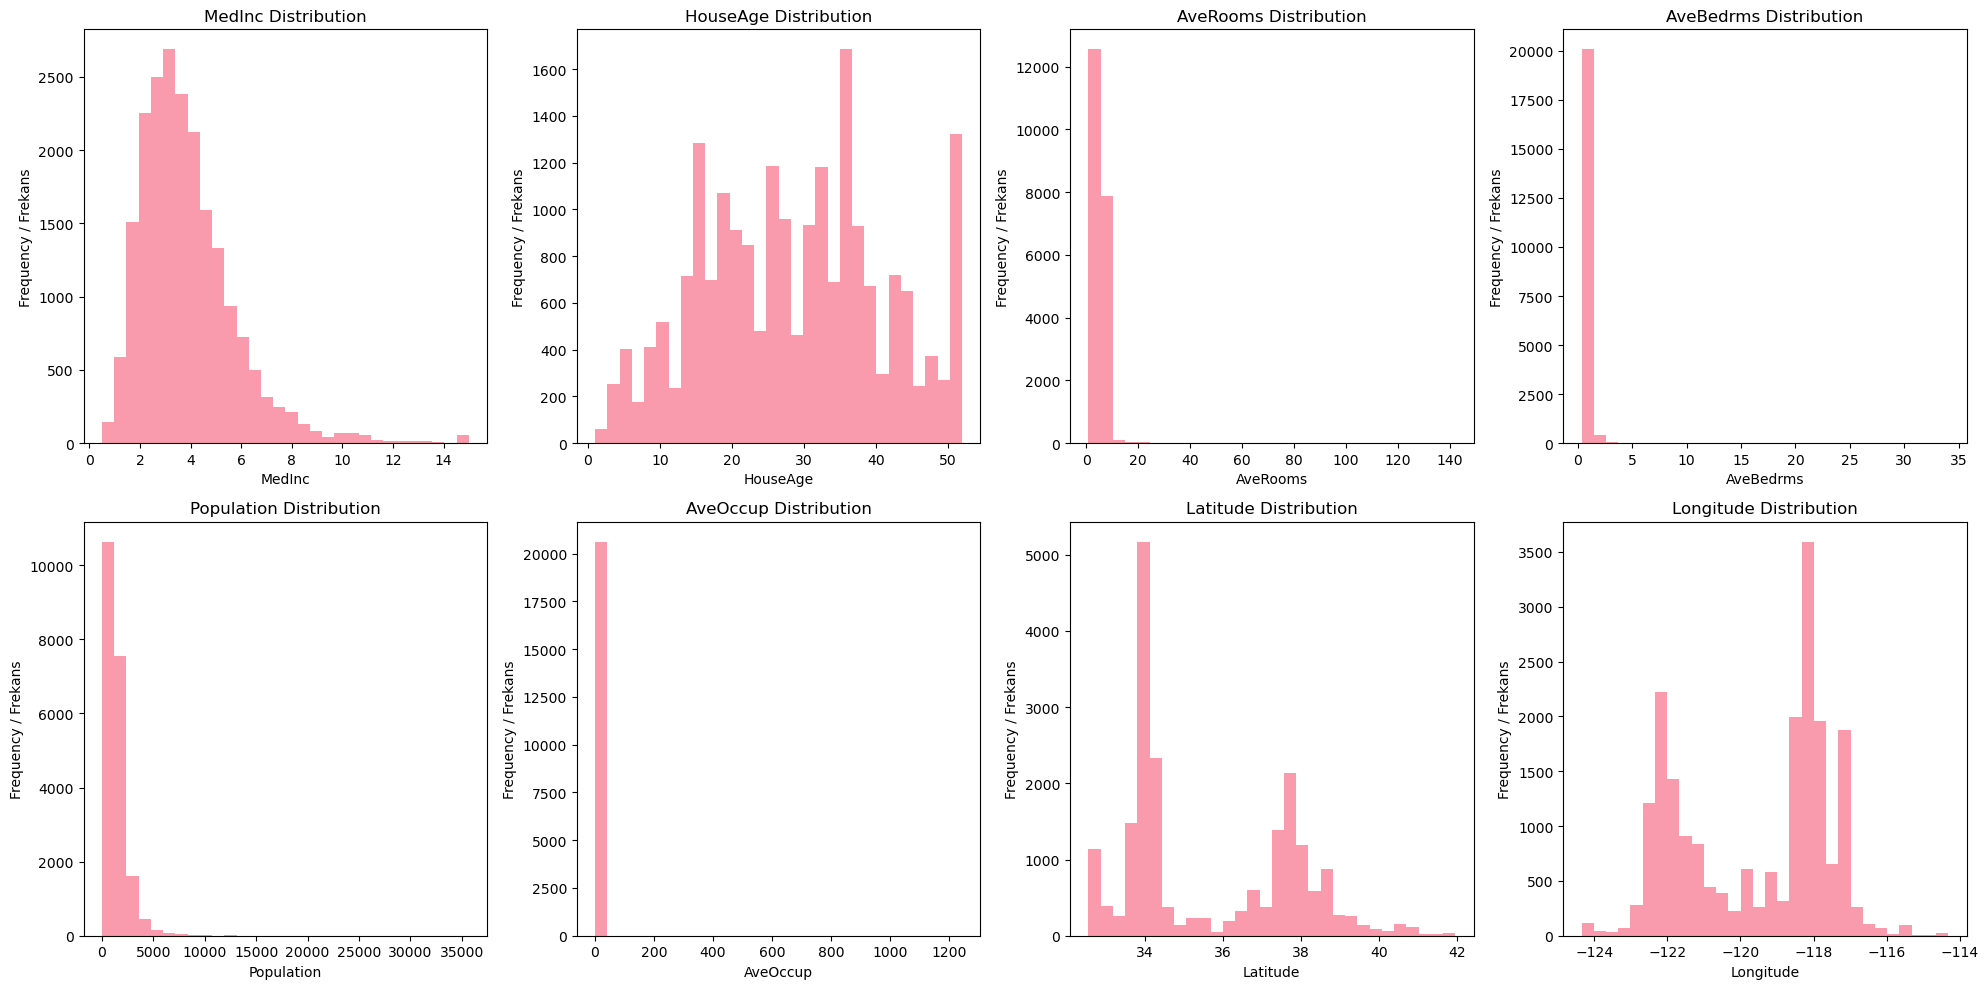

In [8]:
# Feature distributions / Özellik dağılımları
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = df.columns[:-1]

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axes[row, col].hist(df[feature], bins=30, alpha=0.7)
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency / Frekans')

plt.tight_layout()
plt.show()

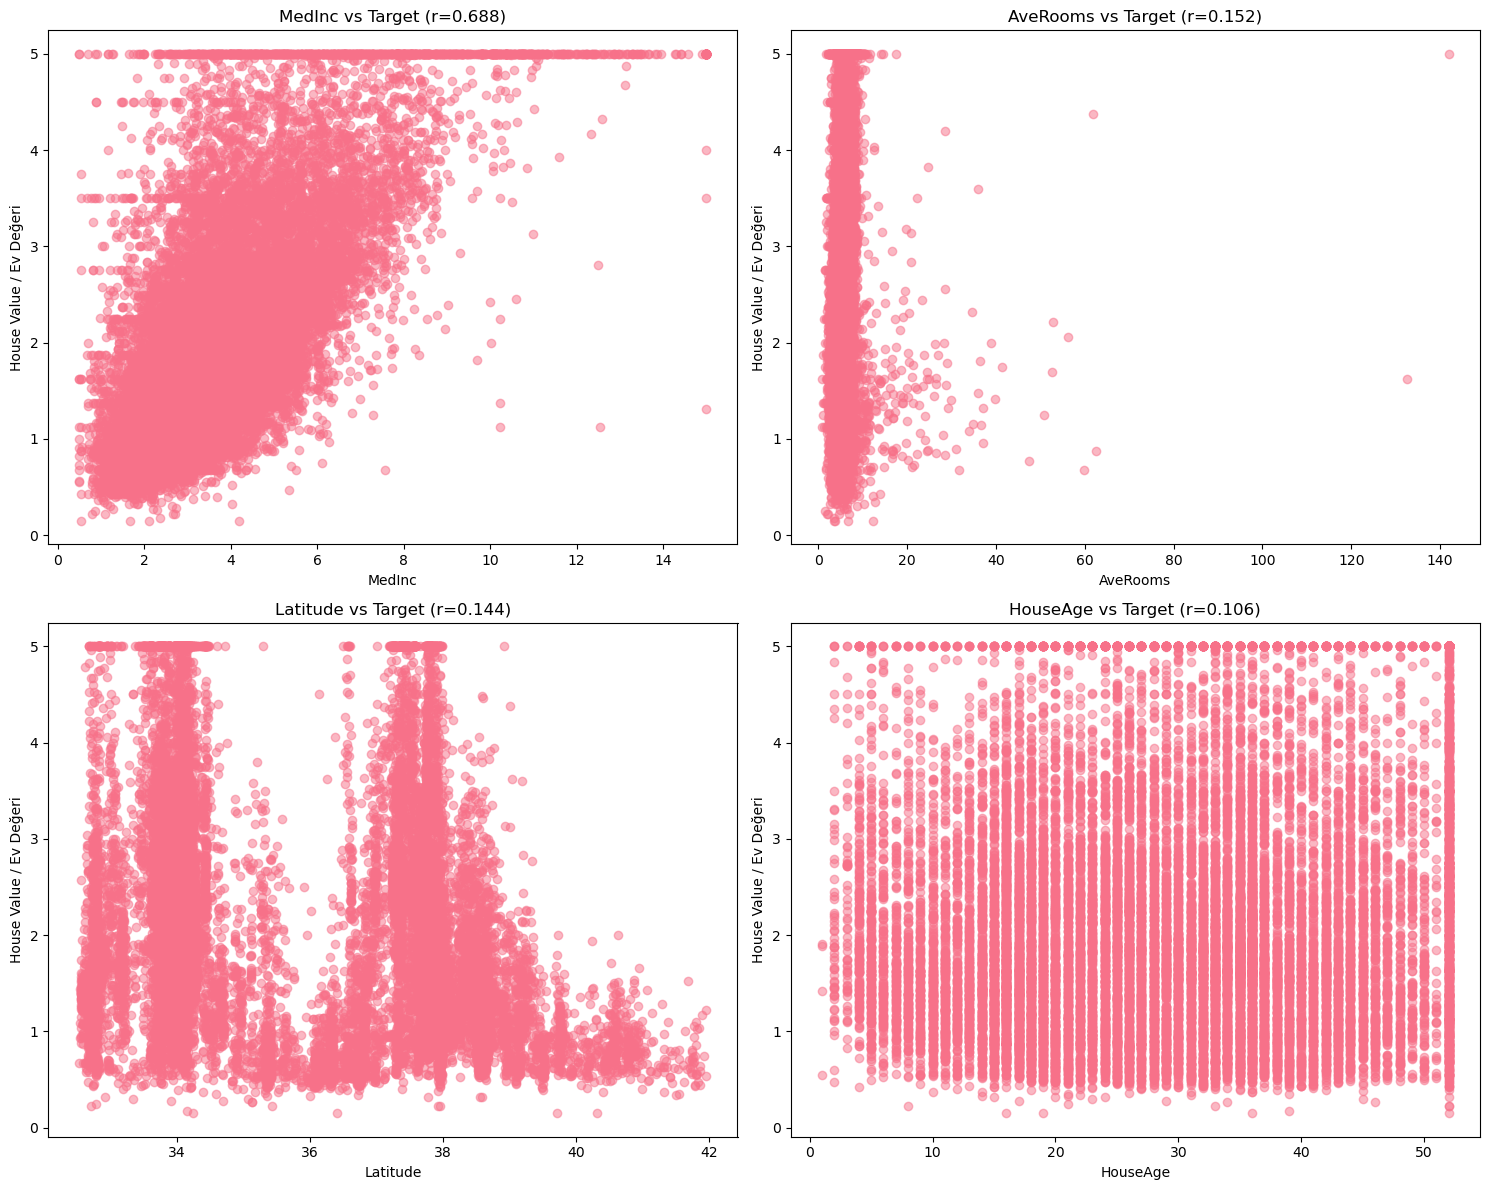

In [9]:
# Scatter plots of top correlated features / En yüksek korelasyonlu özelliklerin scatter plotları
top_features = target_corr[1:5].index

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for i, feature in enumerate(top_features):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df[feature], df['target'], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('House Value / Ev Değeri')
    axes[row, col].set_title(f'{feature} vs Target (r={target_corr[feature]:.3f})')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing / Veri Ön İşleme

In [10]:
# Prepare features and target / Özellikleri ve hedefi hazırlayalım
X = df.drop('target', axis=1)
y = df['target']

# Split the data / Veriyi bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size / Eğitim seti boyutu: {X_train.shape}")
print(f"Test set size / Test seti boyutu: {X_test.shape}")

# Scale features for SVR / SVR için özellikleri ölçeklendirelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size / Eğitim seti boyutu: (16512, 8)
Test set size / Test seti boyutu: (4128, 8)


## 4. Decision Tree Regression Model / Karar Ağacı Regresyon Modeli

In [11]:
# Basic Decision Tree model / Temel Karar Ağacı modeli
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train, y_train)

# Predictions / Tahminler
y_pred_dt_basic = dt_basic.predict(X_test)

# Evaluate basic model / Temel modeli değerlendirelim
mse_basic = mean_squared_error(y_test, y_pred_dt_basic)
rmse_basic = np.sqrt(mse_basic)
r2_basic = r2_score(y_test, y_pred_dt_basic)
mae_basic = mean_absolute_error(y_test, y_pred_dt_basic)

print("Basic Decision Tree Results / Temel Karar Ağacı Sonuçları:")
print(f"RMSE: {rmse_basic:.4f}")
print(f"R² Score: {r2_basic:.4f}")
print(f"MAE: {mae_basic:.4f}")
print(f"Tree depth / Ağaç derinliği: {dt_basic.get_depth()}")
print(f"Number of leaves / Yaprak sayısı: {dt_basic.get_n_leaves()}")

Basic Decision Tree Results / Temel Karar Ağacı Sonuçları:
RMSE: 0.7037
R² Score: 0.6221
MAE: 0.4547
Tree depth / Ağaç derinliği: 34
Number of leaves / Yaprak sayısı: 15854


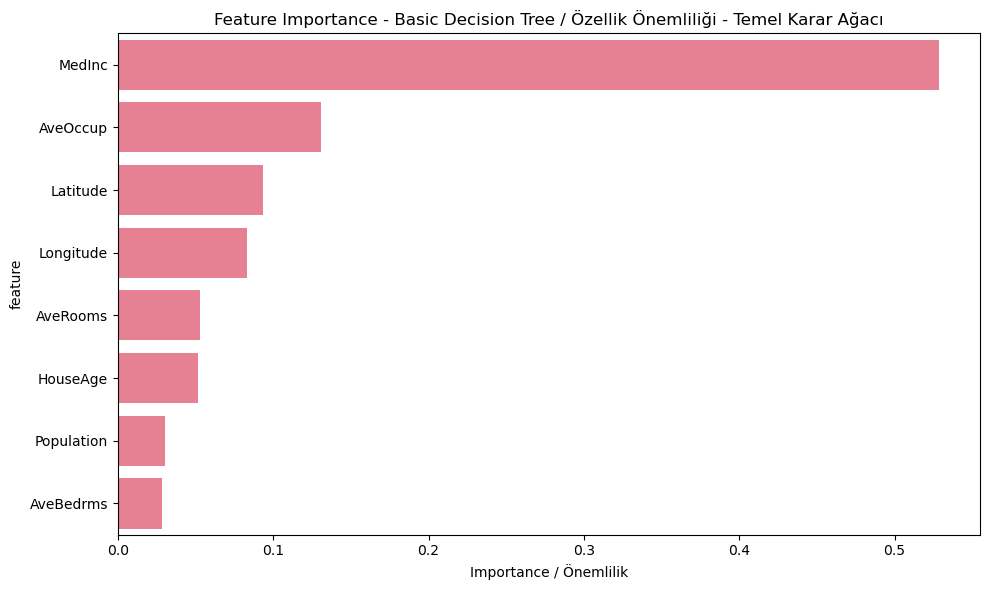


Feature Importance / Özellik Önemliliği:
      feature  importance
0      MedInc    0.528509
5    AveOccup    0.130838
6    Latitude    0.093717
7   Longitude    0.082902
2    AveRooms    0.052975
1    HouseAge    0.051884
4  Population    0.030516
3   AveBedrms    0.028660


In [12]:
# Feature importance / Özellik önemliliği
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_basic.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Basic Decision Tree / Özellik Önemliliği - Temel Karar Ağacı')
plt.xlabel('Importance / Önemlilik')
plt.tight_layout()
plt.show()

print("\nFeature Importance / Özellik Önemliliği:")
print(feature_importance)

## 5. Hyperparameter Optimization / Hiperparametre Optimizasyonu

In [13]:
# Hyperparameter tuning for Decision Tree / Karar Ağacı için hiperparametre ayarlama
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print("Optimizing Decision Tree hyperparameters... / Karar Ağacı hiperparametrelerini optimize ediliyor...")
dt_grid.fit(X_train, y_train)

print("\nBest parameters / En iyi parametreler:")
print(dt_grid.best_params_)
print(f"\nBest CV score / En iyi CV skoru: {-dt_grid.best_score_:.4f}")

Optimizing Decision Tree hyperparameters... / Karar Ağacı hiperparametrelerini optimize ediliyor...

Best parameters / En iyi parametreler:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}

Best CV score / En iyi CV skoru: 0.4182


In [14]:
# Optimized Decision Tree / Optimize edilmiş Karar Ağacı
dt_optimized = dt_grid.best_estimator_
y_pred_dt_opt = dt_optimized.predict(X_test)

# Evaluate optimized model / Optimize edilmiş modeli değerlendirelim
mse_opt = mean_squared_error(y_test, y_pred_dt_opt)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_dt_opt)
mae_opt = mean_absolute_error(y_test, y_pred_dt_opt)

print("Optimized Decision Tree Results / Optimize Edilmiş Karar Ağacı Sonuçları:")
print(f"RMSE: {rmse_opt:.4f}")
print(f"R² Score: {r2_opt:.4f}")
print(f"MAE: {mae_opt:.4f}")
print(f"Tree depth / Ağaç derinliği: {dt_optimized.get_depth()}")
print(f"Number of leaves / Yaprak sayısı: {dt_optimized.get_n_leaves()}")

print(f"\nImprovement / İyileşme:")
print(f"RMSE improvement / RMSE iyileşmesi: {rmse_basic - rmse_opt:.4f}")
print(f"R² improvement / R² iyileşmesi: {r2_opt - r2_basic:.4f}")

Optimized Decision Tree Results / Optimize Edilmiş Karar Ağacı Sonuçları:
RMSE: 0.6600
R² Score: 0.6676
MAE: 0.4516
Tree depth / Ağaç derinliği: 10
Number of leaves / Yaprak sayısı: 491

Improvement / İyileşme:
RMSE improvement / RMSE iyileşmesi: 0.0437
R² improvement / R² iyileşmesi: 0.0455


## 6. Comparison with Other Regression Models / Diğer Regresyon Modelleri ile Karşılaştırma

In [15]:
# Initialize models / Modelleri başlatalım
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf', C=1.0, gamma='scale'),
    'Decision Tree (Basic)': DecisionTreeRegressor(random_state=42),
    'Decision Tree (Optimized)': dt_optimized
}

# Store results / Sonuçları saklayalım
results = []

print("Training and evaluating models... / Modeller eğitiliyor ve değerlendiriliyor...\n")

for name, model in models.items():
    if 'SVR' in name:
        # Use scaled data for SVR / SVR için ölçeklenmiş veri kullan
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics / Metrikleri hesapla
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation score / Çapraz doğrulama skoru
    if 'SVR' in name:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R²': r2,
        'MAE': mae,
        'CV_RMSE': cv_rmse
    })
    
    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  CV RMSE: {cv_rmse:.4f}\n")

# Create results DataFrame / Sonuçlar DataFrame'i oluştur
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')

print("\nModel Comparison Summary / Model Karşılaştırma Özeti:")
print(results_df.round(4))

Training and evaluating models... / Modeller eğitiliyor ve değerlendiriliyor...

Linear Regression:
  RMSE: 0.7456
  R²: 0.5758
  MAE: 0.5332
  CV RMSE: 0.7206

Ridge Regression:
  RMSE: 0.7455
  R²: 0.5759
  MAE: 0.5332
  CV RMSE: 0.7206

Elastic Net:
  RMSE: 0.8744
  R²: 0.4166
  MAE: 0.6763
  CV RMSE: 0.8754

SVR:
  RMSE: 0.5975
  R²: 0.7276
  MAE: 0.3986
  CV RMSE: 0.5932

Decision Tree (Basic):
  RMSE: 0.7037
  R²: 0.6221
  MAE: 0.4547
  CV RMSE: 0.7243

Decision Tree (Optimized):
  RMSE: 0.6600
  R²: 0.6676
  MAE: 0.4516
  CV RMSE: 0.6467


Model Comparison Summary / Model Karşılaştırma Özeti:
                       Model    RMSE      R²     MAE  CV_RMSE
3                        SVR  0.5975  0.7276  0.3986   0.5932
5  Decision Tree (Optimized)  0.6600  0.6676  0.4516   0.6467
4      Decision Tree (Basic)  0.7037  0.6221  0.4547   0.7243
1           Ridge Regression  0.7455  0.5759  0.5332   0.7206
0          Linear Regression  0.7456  0.5758  0.5332   0.7206
2                Elas

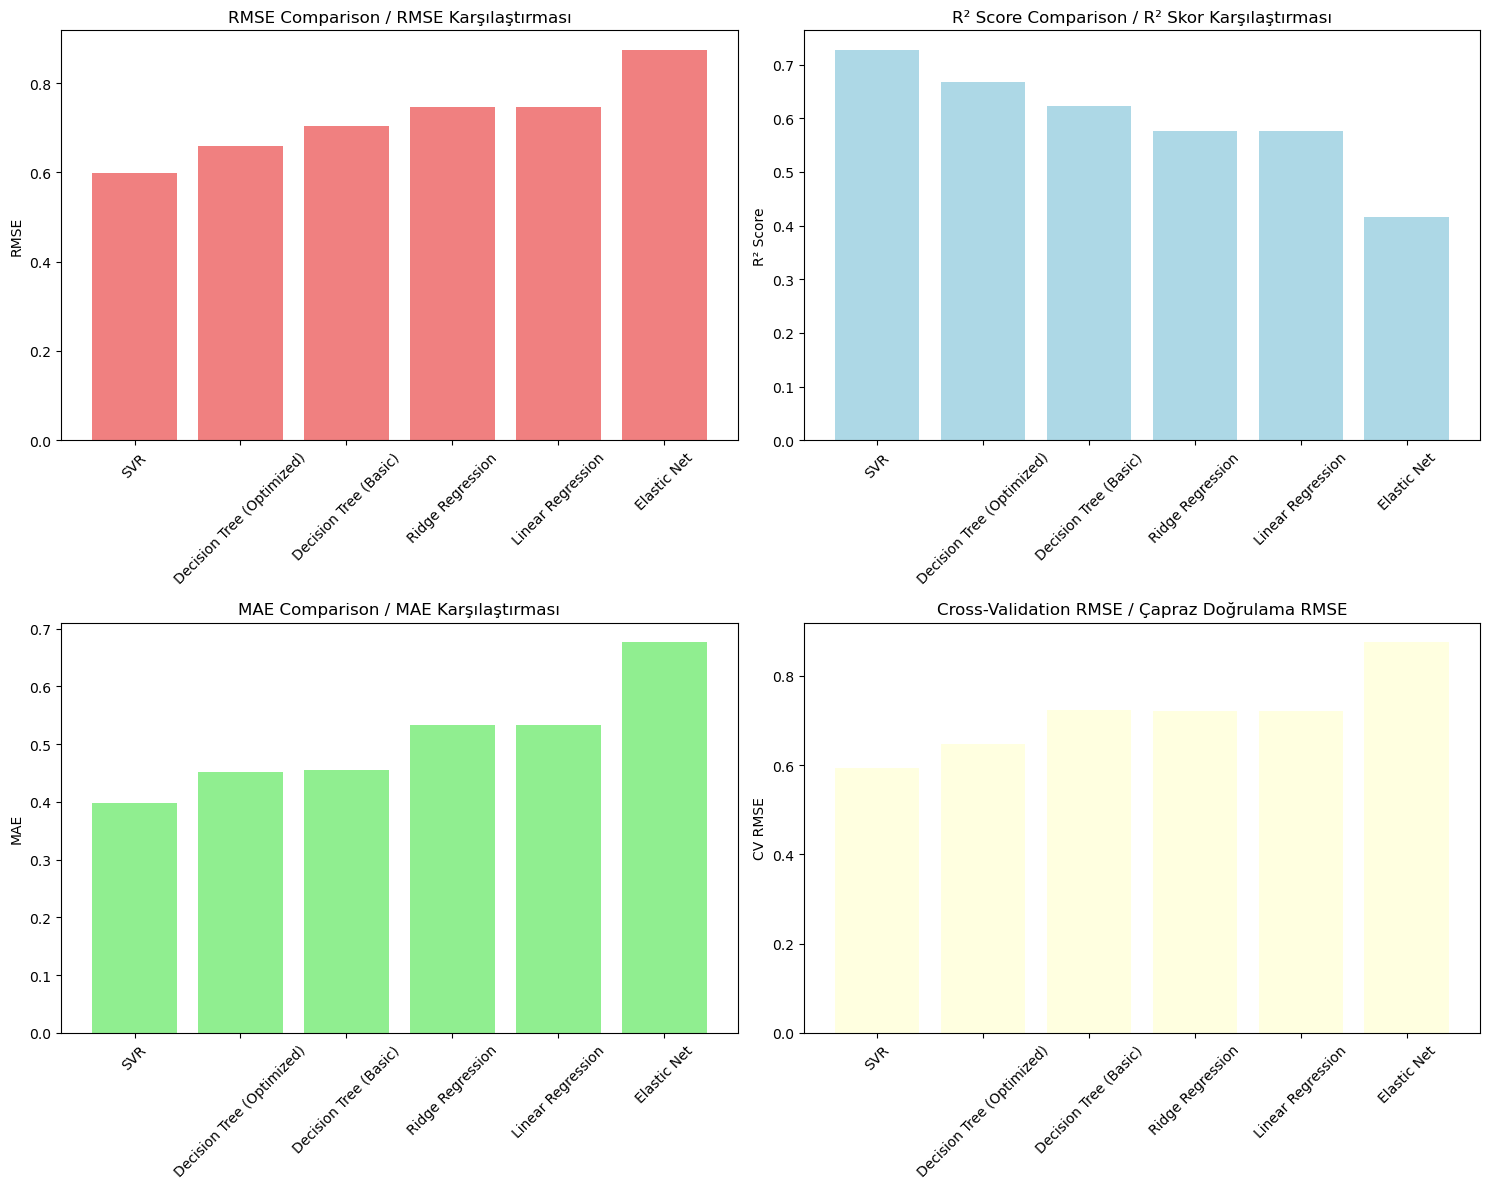

In [16]:
# Visualize model comparison / Model karşılaştırmasını görselleştirelim
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# RMSE comparison / RMSE karşılaştırması
axes[0, 0].bar(results_df['Model'], results_df['RMSE'], color='lightcoral')
axes[0, 0].set_title('RMSE Comparison / RMSE Karşılaştırması')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].tick_params(axis='x', rotation=45)

# R² comparison / R² karşılaştırması
axes[0, 1].bar(results_df['Model'], results_df['R²'], color='lightblue')
axes[0, 1].set_title('R² Score Comparison / R² Skor Karşılaştırması')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison / MAE karşılaştırması
axes[1, 0].bar(results_df['Model'], results_df['MAE'], color='lightgreen')
axes[1, 0].set_title('MAE Comparison / MAE Karşılaştırması')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

# CV RMSE comparison / CV RMSE karşılaştırması
axes[1, 1].bar(results_df['Model'], results_df['CV_RMSE'], color='lightyellow')
axes[1, 1].set_title('Cross-Validation RMSE / Çapraz Doğrulama RMSE')
axes[1, 1].set_ylabel('CV RMSE')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Decision Tree Visualization / Karar Ağacı Görselleştirmesi

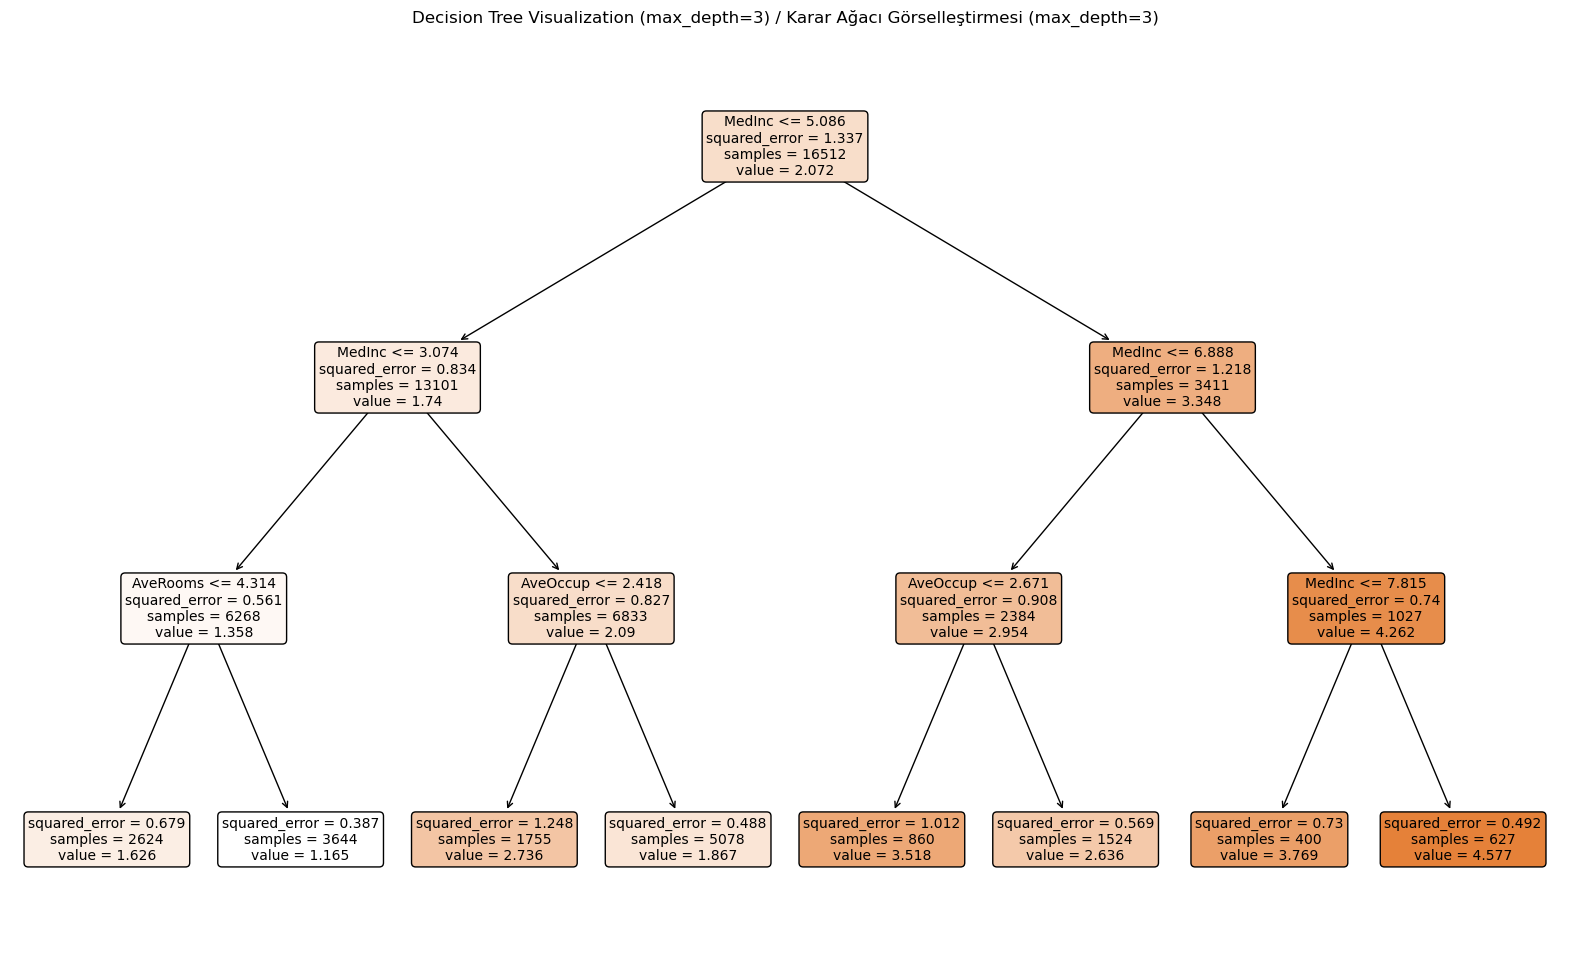


Simplified Tree Performance / Basitleştirilmiş Ağaç Performansı:
RMSE: 0.8015
R² Score: 0.5098


In [17]:
# Visualize a simplified decision tree / Basitleştirilmiş karar ağacını görselleştirelim
dt_simple = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_simple.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(dt_simple, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree Visualization (max_depth=3) / Karar Ağacı Görselleştirmesi (max_depth=3)')
plt.show()

# Performance of simplified tree / Basitleştirilmiş ağacın performansı
y_pred_simple = dt_simple.predict(X_test)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)

print(f"\nSimplified Tree Performance / Basitleştirilmiş Ağaç Performansı:")
print(f"RMSE: {rmse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")

## 8. Residual Analysis / Artık Analizi

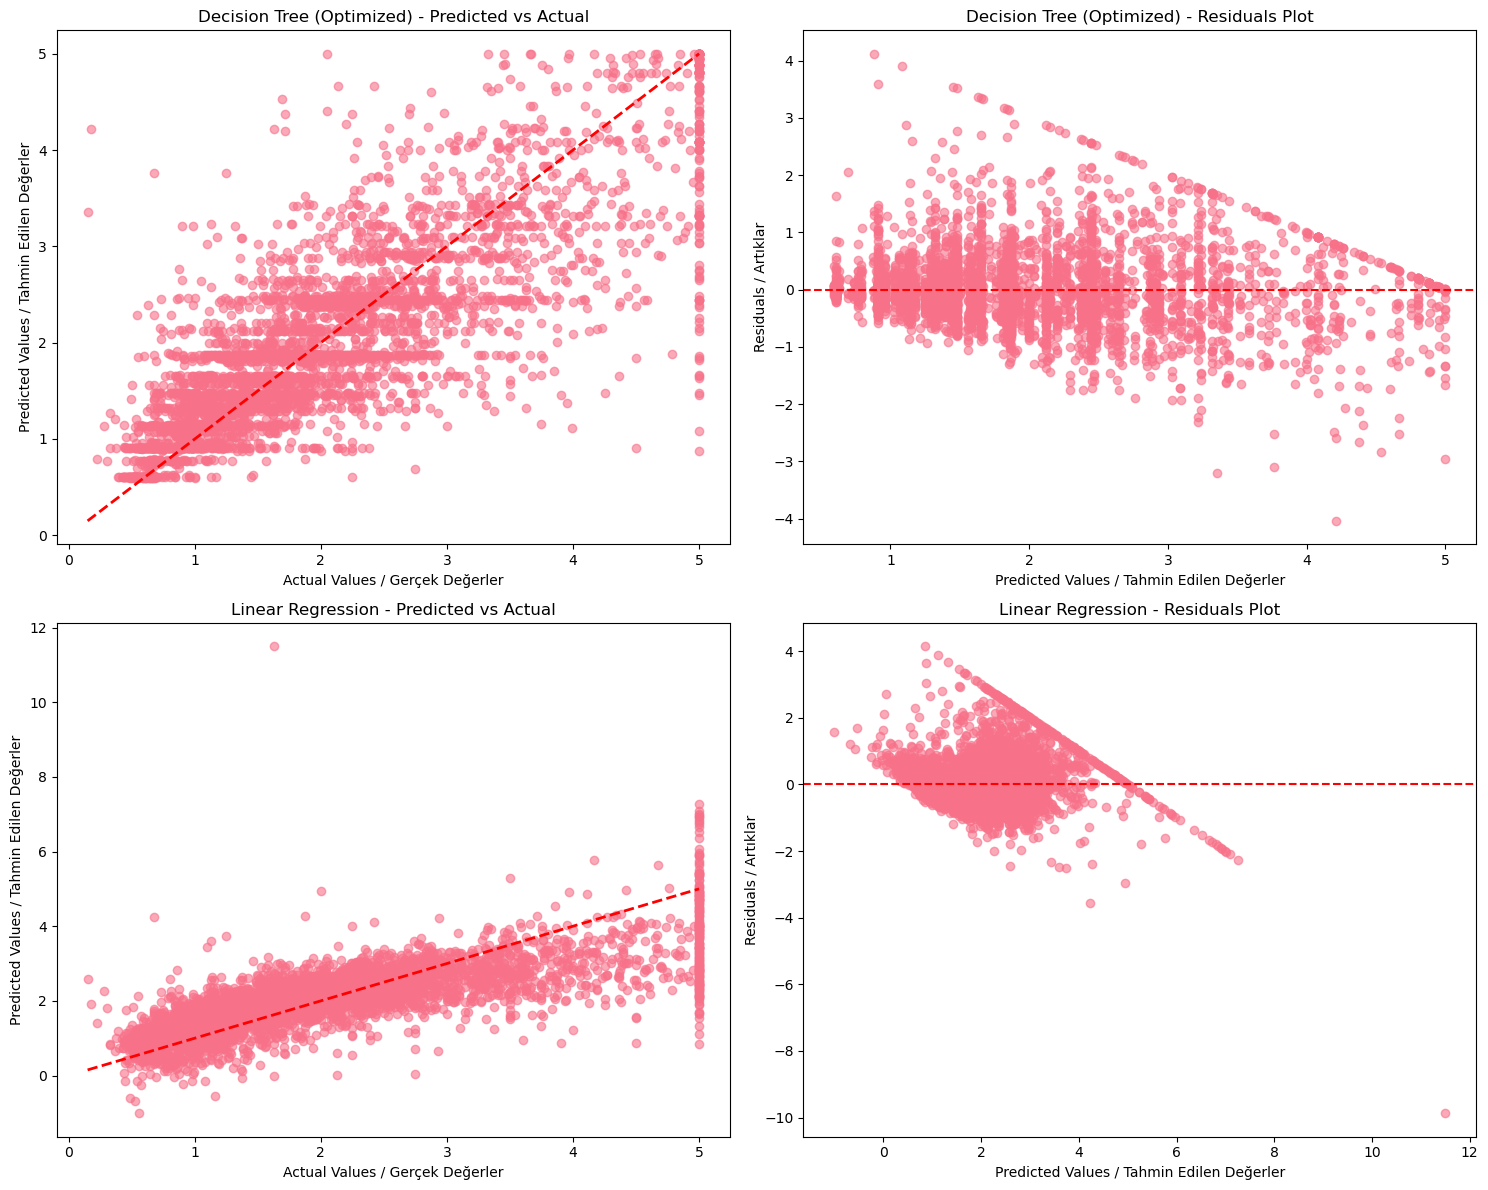

In [18]:
# Residual analysis for best models / En iyi modeller için artık analizi
best_models = ['Decision Tree (Optimized)', 'Linear Regression']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, model_name in enumerate(best_models):
    model = models[model_name]
    
    if 'SVR' in model_name:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    # Predicted vs Actual / Tahmin vs Gerçek
    axes[i, 0].scatter(y_test, y_pred, alpha=0.6)
    axes[i, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i, 0].set_xlabel('Actual Values / Gerçek Değerler')
    axes[i, 0].set_ylabel('Predicted Values / Tahmin Edilen Değerler')
    axes[i, 0].set_title(f'{model_name} - Predicted vs Actual')
    
    # Residuals plot / Artık grafiği
    axes[i, 1].scatter(y_pred, residuals, alpha=0.6)
    axes[i, 1].axhline(y=0, color='r', linestyle='--')
    axes[i, 1].set_xlabel('Predicted Values / Tahmin Edilen Değerler')
    axes[i, 1].set_ylabel('Residuals / Artıklar')
    axes[i, 1].set_title(f'{model_name} - Residuals Plot')

plt.tight_layout()
plt.show()

## 9. Conclusions and Recommendations / Sonuçlar ve Öneriler

**English:**
Based on our comprehensive analysis:

1. **Model Performance**: The optimized Decision Tree showed significant improvement over the basic version
2. **Feature Importance**: MedInc (median income) and AveOccup (average occupancy) are the most important features
3. **Comparison**: Linear models generally performed better than tree-based models on this dataset
4. **Overfitting**: Basic Decision Tree showed signs of overfitting, which was reduced through hyperparameter tuning

**Recommendations:**
- Use cross-validation for reliable model evaluation
- Consider ensemble methods like Random Forest for better performance
- Feature engineering might improve model performance
- Regular model retraining is recommended

**Türkçe:**
Kapsamlı analizimize dayanarak:

1. **Model Performansı**: Optimize edilmiş Karar Ağacı, temel versiyona göre önemli iyileşme gösterdi
2. **Özellik Önemliliği**: MedInc (medyan gelir) ve AveOccup (ortalama doluluk) en önemli özellikler
3. **Karşılaştırma**: Bu veri setinde doğrusal modeller genellikle ağaç tabanlı modellerden daha iyi performans gösterdi
4. **Aşırı Öğrenme**: Temel Karar Ağacı aşırı öğrenme belirtileri gösterdi, hiperparametre ayarlama ile azaltıldı

**Öneriler:**
- Güvenilir model değerlendirmesi için çapraz doğrulama kullanın
- Daha iyi performans için Random Forest gibi topluluk yöntemlerini düşünün
- Özellik mühendisliği model performansını artırabilir
- Düzenli model yeniden eğitimi önerilir

In [19]:
# Final summary table / Son özet tablosu
print("=" * 80)
print("FINAL MODEL COMPARISON SUMMARY / SON MODEL KARŞILAŞTIRMA ÖZETİ")
print("=" * 80)
print(results_df.round(4).to_string(index=False))
print("=" * 80)

best_model = results_df.iloc[0]
print(f"\nBest Model / En İyi Model: {best_model['Model']}")
print(f"RMSE: {best_model['RMSE']:.4f}")
print(f"R² Score: {best_model['R²']:.4f}")
print(f"MAE: {best_model['MAE']:.4f}")
print(f"CV RMSE: {best_model['CV_RMSE']:.4f}")

FINAL MODEL COMPARISON SUMMARY / SON MODEL KARŞILAŞTIRMA ÖZETİ
                    Model   RMSE     R²    MAE  CV_RMSE
                      SVR 0.5975 0.7276 0.3986   0.5932
Decision Tree (Optimized) 0.6600 0.6676 0.4516   0.6467
    Decision Tree (Basic) 0.7037 0.6221 0.4547   0.7243
         Ridge Regression 0.7455 0.5759 0.5332   0.7206
        Linear Regression 0.7456 0.5758 0.5332   0.7206
              Elastic Net 0.8744 0.4166 0.6763   0.8754

Best Model / En İyi Model: SVR
RMSE: 0.5975
R² Score: 0.7276
MAE: 0.3986
CV RMSE: 0.5932
